In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import learning_curve, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.compose import ColumnTransformer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from xgboost import XGBClassifier
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import re
import string
import seaborn as sns

In [ ]:
SPLIT_SIZE = 0.8
RANDOM_SIZE = 200

# Read into a dataframe:
df = pd.read_csv(r'C:\Data Sciences\Data\all_data_files\tweets.csv')
df_copy = df.copy()
print('\nTraining Data Shape: ', df_copy.shape)

# Split dataframe into spefic ratio:
train_df = df_copy.sample(frac = SPLIT_SIZE, random_state = RANDOM_SIZE) #random state is a seed value
print('\nTraining Data Shape: ', train_df.shape)

test_df = df_copy.drop(train_df.index)
print('\nTest Data Shape: ', test_df.shape)

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(df_copy.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [ ]:
import missingno as msno

msno.matrix(df_copy, labels=True, sort="descending")

In [ ]:
df_copy.plot(lw =  0,
          marker = "*",
          subplots = True,
          layout = (3, 2),
          figsize = (15, 30),
          markersize = 1)

In [ ]:
df_copy.describe().transpose()

In [ ]:
df_copy.hist(bins=25, figsize=(15, 25), layout=(5, 2), edgecolor="black")
plt.tight_layout()

In [ ]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_copy.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_copy.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))

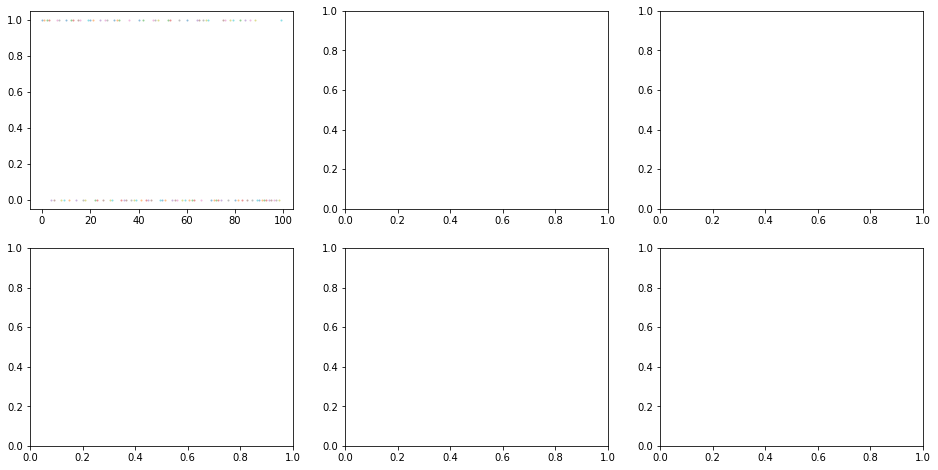

In [47]:
# Specify features of interest
selected_features = ["id", "keyword", "location", "text", "target"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_copy, x=col, y=df_copy["target"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout()

In [ ]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_copy, x=col, y=df_copy["location"], palette="Set2",
                   split=True, hue="target", ax=ax)
plt.tight_layout()

In [ ]:
df_corr = df_copy.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [ ]:
# Target values on trained data set:
print(f"Proportion of NaN keyword values: {train_df.target.value_counts(normalize = True)}")
print(f"Proportion of NaN keyword values: {train_df.keyword.isna().sum() / len(train_df)}")
print(f"Proportion of NaN location values: {train_df.location.isna().sum() / len(train_df)}")